# Pregunta 03 - Examen
## Logaritmo Henry Briggs

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

# --- CONSTANTES ---
# Alpha es la pendiente 
ALPHA = 1 / math.log(10)
CIFRAS_SIG = 6
N_RAICES = 5  # Iteraciones 

# --- FUNCIÓN DE REDONDEO ---
def redondear_sig(x, cifras):
    """Redondea un número a una cantidad específica de cifras significativas."""
    if x == 0:
        return 0
    # Determinar la magnitud del número para saber dónde cortar
    magnitude = int(math.floor(math.log10(abs(x))))
    digits_to_round = cifras - 1 - magnitude
    return round(x, digits_to_round)

# --- BRIGGS ---
def briggs_directo(x):
    """
    Calcula log10(x) aplicando n raíces cuadradas hasta acercarse a 1,
    usando la aproximación lineal y regresando al valor original.
    """
    val = x
    for _ in range(N_RAICES):
        val = math.sqrt(val)
        val = redondear_sig(val, CIFRAS_SIG) # Redondeo en cada paso de raíz
    r = val - 1
    log_aprox = ALPHA * r
    
    # Deshacemos las raíces cuadradas 
    return log_aprox * (2 ** N_RAICES)

# --- CÁLCULO DE VALORES ---
log_briggs = {}
log_real = {}
errores = {}

# Base 
log_briggs[1] = 0.0
log_briggs[10] = 1.0
log_briggs[2] = briggs_directo(2)
log_briggs[3] = briggs_directo(3)
log_briggs[7] = briggs_directo(7)

# Segun Propiedades 
log_briggs[4] = 2 * log_briggs[2]           # log(2^2)
log_briggs[5] = 1.0 - log_briggs[2]         # log(10/2) = log(10) - log(2)
log_briggs[8] = 3 * log_briggs[2]           # log(2^3)
log_briggs[9] = 2 * log_briggs[3]           # log(3^2)


# --- ANÁLISIS DEL CASO LOG(6) ---
# Opción 1: Propiedad de suma (log 2 + log 3)
log_6_opcion1 = log_briggs[2] + log_briggs[3]
val_pista = 1.0077696
r_pista = val_pista - 1
log_mantisa = ALPHA * r_pista  # Aproximación lineal directa
log_6_opcion2 = (log_mantisa + 7) / 9

log_briggs[6] = log_6_opcion1 

# --- IMPRESION TABLA ---
print(f"{'x':<3} | {'Briggs':<15} | {'Real':<15} | {'Error Relativo':<15}")
lista_x = sorted(log_briggs.keys())

for x in lista_x:
    real = math.log10(x)
    aprox = log_briggs[x]
    
    if real == 0:
        error = 0.0
    else:
        error = abs((real - aprox) / real)
    
    log_real[x] = real
    errores[x] = error
    
    print(f"{x:<3} | {aprox:<15.6f} | {real:<15.6f} | {error:.4e}")

print("\n--- Comparacion LOG10(6) ---")
real_6 = math.log10(6)
err_opt1 = abs((real_6 - log_6_opcion1)/real_6)
err_opt2 = abs((real_6 - log_6_opcion2)/real_6)

print(f"Valor Real          : {real_6:.8f}")
print(f"Opción 1 : {log_6_opcion1:.8f} -> Error: {err_opt1:.4e}")
print(f"Opción 2 : {log_6_opcion2:.8f} -> Error: {err_opt2:.4e}")



x   | Briggs          | Real            | Error Relativo 
1   | 0.000000        | 0.000000        | 0.0000e+00
2   | 0.304354        | 0.301030        | 1.1041e-02
3   | 0.485437        | 0.477121        | 1.7429e-02
4   | 0.608707        | 0.602060        | 1.1041e-02
5   | 0.695646        | 0.698970        | 4.7550e-03
6   | 0.789791        | 0.778151        | 1.4958e-02
7   | 0.871229        | 0.845098        | 3.0921e-02
8   | 0.913061        | 0.903090        | 1.1041e-02
9   | 0.970874        | 0.954243        | 1.7429e-02
10  | 1.000000        | 1.000000        | 0.0000e+00

--- Comparacion LOG10(6) ---
Valor Real          : 0.77815125
Opción 1 : 0.78979057 -> Error: 1.4958e-02
Opción 2 : 0.77815270 -> Error: 1.8621e-06


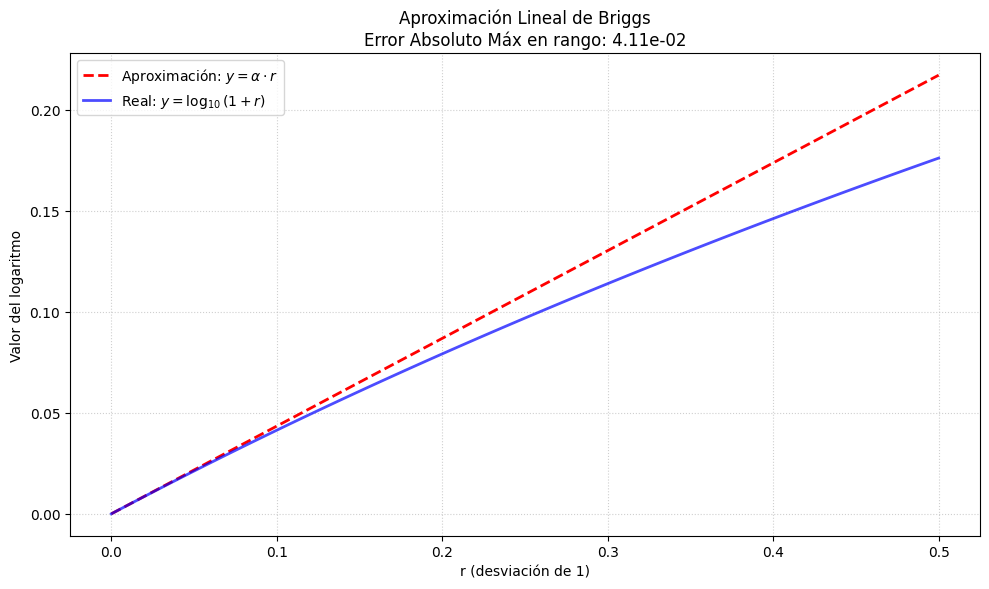

In [ ]:
# --- GRÁFICA DE LA APROXIMACION ---
# Generamos valores de r cercanos a 0 
r_values = np.linspace(0, 0.5, 100) 

# Función aproximada
y_approx = ALPHA * r_values

# Función real: y = log10(1 + r)
y_real_plot = np.log10(1 + r_values)

# Calcular el error absoluto máximo en este rango
max_abs_error = np.max(np.abs(y_real_plot - y_approx))

plt.figure(figsize=(10, 6))
plt.plot(r_values, y_approx, 'r--', label=r'Aproximación: $y = \alpha \cdot r$', linewidth=2)
plt.plot(r_values, y_real_plot, 'b-', label=r'Real: $y = \log_{10}(1+r)$', linewidth=2, alpha=0.7)
plt.title(f'Aproximación Lineal de Briggs\nError Absoluto Máx en rango: {max_abs_error:.2e}')
plt.xlabel('r (desviación de 1)')
plt.ylabel('Valor del logaritmo')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()